In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
df = yf.download('GOOGL', start='2010-01-01',end='2025-01-01')

/tmp/ipython-input-2760281036.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('GOOGL', start='2010-01-01',end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


In [ ]:
df.shape


(3774, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 to 2024-12-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   3774 non-null   float64
 1   (High, GOOGL)    3774 non-null   float64
 2   (Low, GOOGL)     3774 non-null   float64
 3   (Open, GOOGL)    3774 non-null   float64
 4   (Volume, GOOGL)  3774 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2010-01-04,15.590931,15.659589,15.528494,15.595906,78169752
2010-01-05,15.522273,15.618046,15.461328,15.601627,120067812
2010-01-06,15.130977,15.568791,15.083713,15.568791,158988852
2010-01-07,14.778734,15.174261,14.742665,15.159335,256315428
2010-01-08,14.975752,15.006348,14.654604,14.726495,188783028


In [ ]:
df['Target_Close'] = df['Close'].shift(-1)

In [ ]:
df.dropna(inplace=True)

In [ ]:
x=df[['Open','High','Low','Volume']]
y=df['Target_Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"✅ Mean Squared Error: {mse:.2f}")
print(f"✅ R² Score: {r2:.4f}")

✅ Mean Squared Error: 7.84
✅ R² Score: 0.9894


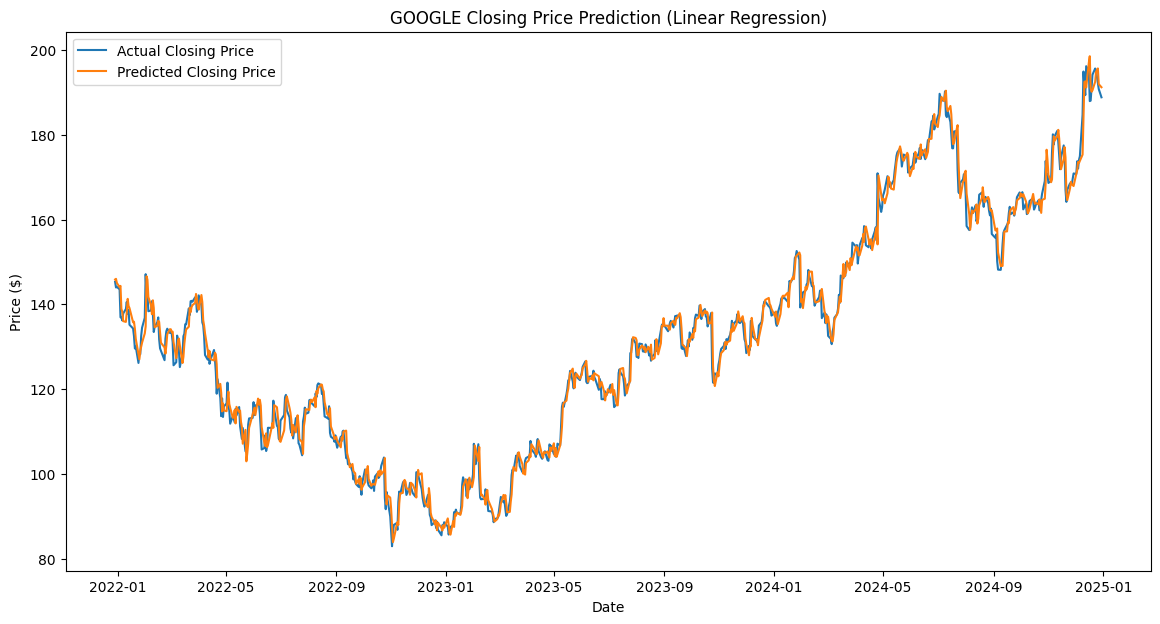

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Closing Price')
plt.plot(y_test.index, y_pred, label='Predicted Closing Price')
plt.title('GOOGLE Closing Price Prediction (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [ ]:
model2=RandomForestRegressor()
model2.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred2=model2.predict(X_test)

✅ Mean Squared Error (Random Forest): 173.51
✅ R² Score (Random Forest): 0.7661


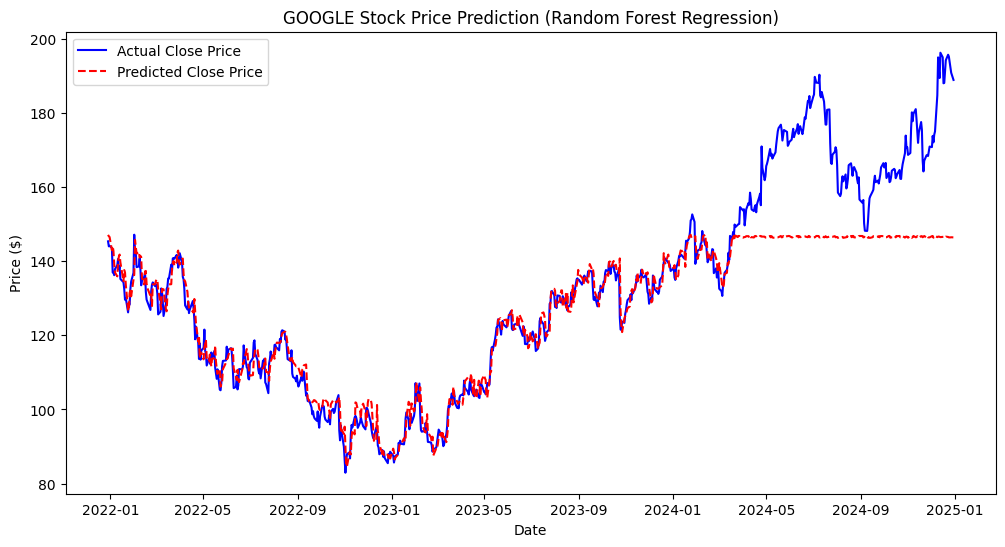

In [ ]:
mse2 = mean_squared_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)
print(f"✅ Mean Squared Error (Random Forest): {mse2:.2f}")
print(f"✅ R² Score (Random Forest): {r22:.4f}")
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred2, label='Predicted Close Price', color='red', linestyle='--')
plt.title('GOOGLE Stock Price Prediction (Random Forest Regression)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [ ]:


model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'Mean Squared Error': [mse, mse2],
    'R^2 Score': [r2, r22]
})

display(model_comparison)

,Model,Mean Squared Error,R^2 Score
0,Linear Regression,7.837948,0.989435
1,Random Forest,173.513944,0.766105
